<a href="https://colab.research.google.com/github/peeyush91099/Major-Project/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/complete.csv')
df


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [59]:
df.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

In [60]:
df.dropna()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4687,2020-08-06,Telangana,18.1124,79.0193,73050.0,589,52103.0,2092,0,1289
4688,2020-08-06,Tripura,23.9408,91.9882,5725.0,31,3793.0,97,0,68
4689,2020-08-06,Uttar Pradesh,26.8467,80.9462,104388.0,1857,60558.0,4078,0,3287
4690,2020-08-06,Uttarakhand,30.0668,79.0193,8254.0,98,5233.0,246,0,386


In [61]:
df_kerala = df[df['Name of State / UT'] == 'Kerala']
df_kerala

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4533,2020-08-02,Kerala,10.8505,76.2711,24742.0,81,13775.0,1129,0,752
4568,2020-08-03,Kerala,10.8505,76.2711,25911.0,82,14463.0,1169,0,688
4603,2020-08-04,Kerala,10.8505,76.2711,26873.0,84,15278.0,962,0,815
4638,2020-08-05,Kerala,10.8505,76.2711,27956.0,87,16299.0,1083,0,1021


In [62]:
df_kerala.rename(columns = {'New cases' : 'y','Date':'ds'},inplace = True)
df_kerala

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,y,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1.0,0,0.0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2.0,0,0.0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3.0,0,0.0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3.0,0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4533,2020-08-02,Kerala,10.8505,76.2711,24742.0,81,13775.0,1129,0,752
4568,2020-08-03,Kerala,10.8505,76.2711,25911.0,82,14463.0,1169,0,688
4603,2020-08-04,Kerala,10.8505,76.2711,26873.0,84,15278.0,962,0,815
4638,2020-08-05,Kerala,10.8505,76.2711,27956.0,87,16299.0,1083,0,1021


In [63]:
df_new = df_kerala[['ds','y']]
df_new

,ds,y
0,2020-01-30,0
1,2020-01-31,0
2,2020-02-01,1
3,2020-02-02,1
4,2020-02-03,0
...,...,...
4533,2020-08-02,1129
4568,2020-08-03,1169
4603,2020-08-04,962
4638,2020-08-05,1083


In [64]:
df_new['ds'] = pd.to_datetime(df_new['ds'])
df_new['y'] = df_new['y'].astype(int)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 4673
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      186 non-null    datetime64[ns]
 1   y       186 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()

In [67]:
df_new['y'].values

array([   0,    0,    1,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    5,    1,    6,    2,    0,    0,
          2,    4,    0,    3,    1,    0,    1,   12,   12,   15,   28,
         14,    9,   19,   39,    6,   12,   40,    7,   24,   21,    9,
         11,    8,   13,    9,    9,   12,    7,    0,   12,    3,    8,
          1,    7,    1,    4,    2,    6,   19,   11,    9,    3,    7,
          1,   23,    4,   10,    2,    0,    2,    1,    0,    2,    1,
          0,    0,    2,    7,    7,    5,   10,   26,   16,   11,   14,
         29,   12,   24,   24,   42,   63,   52,   49,   67,   41,   84,
         62,   58,   61,   57,   86,   82,   94,  111,  108,  107,   91,
         91,   65,   83,   78,   85,   54,   82,   79,   75,   97,  118,
        127,  133,  138,  141,  152,  273,  195,  1

In [77]:
df_new['y'] = sc.fit_transform(df_new['y'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
df_new

,ds,y,y1
0,2020-01-30,-0.495231,-0.495231
1,2020-01-31,-0.495231,-0.495231
2,2020-02-01,-0.492071,-0.492071
3,2020-02-02,-0.492071,-0.492071
4,2020-02-03,-0.495231,-0.495231
...,...,...,...
4533,2020-08-02,3.072369,3.072369
4568,2020-08-03,3.198768,3.198768
4603,2020-08-04,2.544655,2.544655
4638,2020-08-05,2.927011,2.927011


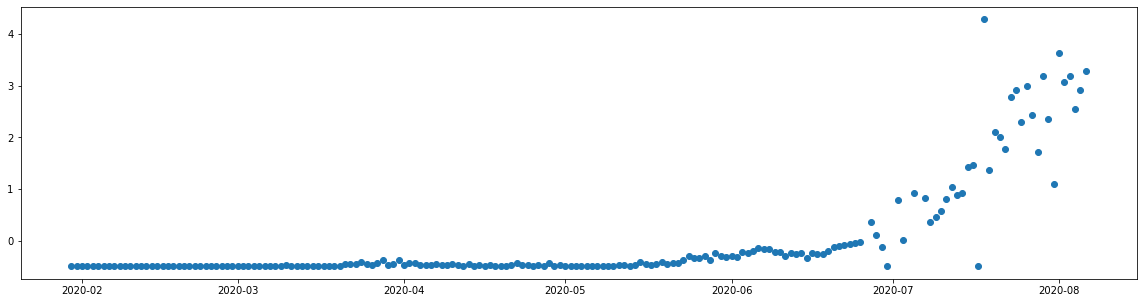

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df_new['ds'],df_new['y1'])
plt.show()

In [80]:
import fbprophet

op = fbprophet.Prophet(changepoint_prior_scale=1)
op.fit(df_new)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [81]:
forecast = op.make_future_dataframe(periods = 365 ,freq = 'D')
forecast = op.predict(forecast)


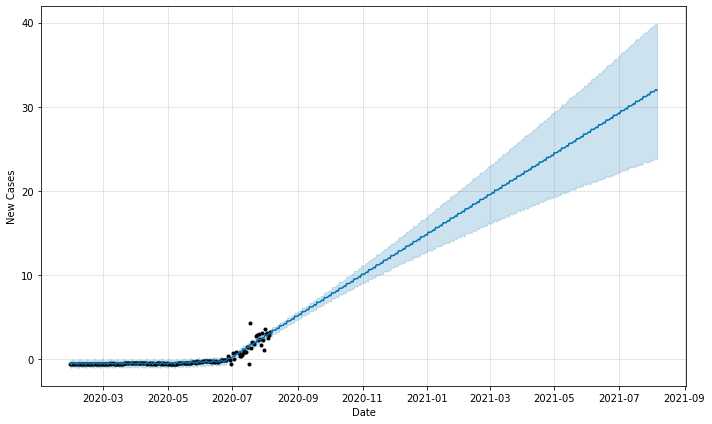

In [82]:
op.plot(forecast,xlabel = 'Date',ylabel='New Cases');
